# CONTEXT

- This dataset consists of 200K+ recipes and 1.1M+ recipe reviews covering 18 years of user interactions and uploads on Food.com (formerly GeniusKitchen). used in the following paper:

Generating Personalized Recipes from Historical User Preferences
Bodhisattwa Prasad Majumder*, Shuyang Li*, Jianmo Ni, Julian McAuley
EMNLP, 2019
https://www.aclweb.org/anthology/D19-1613/

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns 

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import Word, TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings
warnings.filterwarnings("ignore")

In [2]:
recipes = pd.read_csv('RAW_recipes.csv', parse_dates=['submitted'])
recipes.head(10)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"['fennel seeds', 'green olives', 'ripe olives'...",9
7,backyard style barbecued ribs,67888,120,10404,2003-07-30,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22
8,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...",NaN,"['chocolate sandwich style cookies', 'chocolat...",6
9,beat this banana bread,75452,70,15892,2003-11-04,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"['preheat oven to 350 degrees', 'butter two 9x...",from ann hodgman's,"['sugar', 'unsalted butter', 'bananas', 'eggs'...",9


In [3]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   name            231636 non-null  object        
 1   id              231637 non-null  int64         
 2   minutes         231637 non-null  int64         
 3   contributor_id  231637 non-null  int64         
 4   submitted       231637 non-null  datetime64[ns]
 5   tags            231637 non-null  object        
 6   nutrition       231637 non-null  object        
 7   n_steps         231637 non-null  int64         
 8   steps           231637 non-null  object        
 9   description     226658 non-null  object        
 10  ingredients     231637 non-null  object        
 11  n_ingredients   231637 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 21.2+ MB


In [4]:
recipes.shape

(231637, 12)

**Recipes dataset consists of 231637 rows(recipes) and 12 columns**

In [5]:
ratings = pd.read_csv('RAW_interactions.csv', parse_dates=['date'])
ratings.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   user_id    1132367 non-null  int64         
 1   recipe_id  1132367 non-null  int64         
 2   date       1132367 non-null  datetime64[ns]
 3   rating     1132367 non-null  int64         
 4   review     1132198 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 43.2+ MB


In [7]:
ratings.shape

(1132367, 5)

**Ratings dataset consists of 1132367 rows(reviews) and 5 columns**

In [8]:
recipes.rename(columns={'id': 'recipe_id'}, inplace=True)
df = recipes.merge(ratings, how="left", on="recipe_id")

In [9]:
df.isnull().sum()

name                  1
recipe_id             0
minutes               0
contributor_id        0
submitted             0
tags                  0
nutrition             0
n_steps               0
steps                 0
description       23510
ingredients           0
n_ingredients         0
user_id               0
date                  0
rating                0
review              169
dtype: int64

In [10]:
df.dropna(inplace=True) 

**Since our dataset is quite large, we can drop the missing data.**

In [11]:
df[['nutrition']]

,nutrition
0,"[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]"
1,"[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]"
2,"[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]"
3,"[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]"
4,"[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]"
...,...
1132362,"[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]"
1132363,"[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]"
1132364,"[174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]"
1132365,"[174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]"


**The values in the nutrition column are the values of different nutritional contents of foods.  
We can create new columns from these values.**

In [12]:
df[['calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)',
    'saturated fat (PDV)', 'carbohydrates (PDV)']] = df.nutrition.str.split(",", expand=True)

df['calories'] = df['calories'].str.replace('[', '')
df['carbohydrates (PDV)'] = df['carbohydrates (PDV)'].str.replace(']', '')

In [13]:
df[['calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)',
    'carbohydrates (PDV)']] = df[['calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)',
                                  'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)']].astype('float')

In [14]:
df.head()

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,date,rating,review,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...,51.50,0.00,13.00,0.00,2.00,0.00,4.00
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,2010-08-21,5,This was a nice change. I used butternut squas...,51.50,0.00,13.00,0.00,2.00,0.00,4.00
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,178427,2011-12-05,5,Excellent recipe! I used butternut squash and ...,51.50,0.00,13.00,0.00,2.00,0.00,4.00
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,28603,2002-08-19,0,"Have not tried this, but it sounds delicious. ...",173.40,18.00,0.00,17.00,22.00,35.00,1.00
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,346277,2006-08-27,5,This recipe was wonderful. Instead of using t...,173.40,18.00,0.00,17.00,22.00,35.00,1.00


In [15]:
df.drop('nutrition', axis=1, inplace=True)

## Recipe Analysis

In [16]:
# how many unique recipes are there ? 

df['name'].nunique()

225285

**Recipes with the highest rating among recipes with at least 500 reviews**

In [17]:
(df.groupby('name').filter(lambda x : len(x) > 500)).groupby('name')['rating'].agg({'count', 'mean'}).sort_values(by=['mean', 'count'], 
                                                                ascending=[False, False])[:10].style.background_gradient(cmap = "Reds")

,count,mean
name,,
kittencal s italian melt in your mouth meatballs,997,4.708124
crumb topped banana muffins,540,4.705556
oven fried chicken chimichangas,802,4.699501
reeses squares 5 ingredients no bake reese s,596,4.691275
my family s favorite sloppy joes pizza joes,720,4.609722
kittencal s chocolate frosting icing,509,4.609037
kittencal s moist cheddar garlic oven fried chicken breast,855,4.605848
chicken tortilla soup ii,591,4.553299
creamy cajun chicken pasta,1448,4.541436


**Recipes with the lowest rating among recipes with at least 500 reviews**

In [18]:
(df.groupby('name').filter(lambda x : len(x) > 500)).groupby('name')['rating'].agg({'count', 'mean'}).sort_values(by=['mean', 'count'],
                                                                ascending=[True, False])[:10].style.background_gradient(cmap = "Reds")

,count,mean
name,,
the best ever waffles,507,3.802761
the best chili you will ever taste,577,3.880416
better than olive garden alfredo sauce,561,3.932264
poverty meal,516,4.032946
easy stove top macaroni cheese,528,4.089015
the sweetest blueberry muffins,570,4.145614
panera broccoli cheese soup,517,4.177950
melt in your mouth chicken breasts,561,4.183601
best banana bread,1610,4.184472


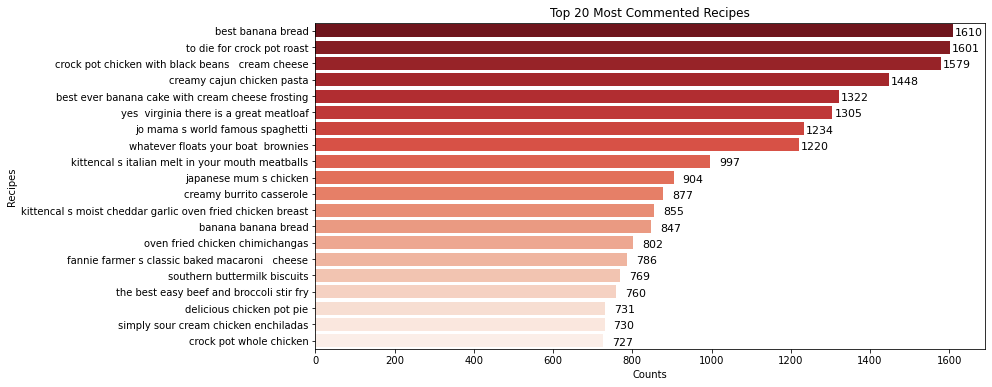

In [19]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(y = df['name'], order=df['name'].value_counts().index[:20], palette='Reds_r')
for p in ax.patches:
    ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(30, -11), fontsize=11, color='black',textcoords='offset points',
                horizontalalignment='right')
plt.title('Top 20 Most Commented Recipes')
plt.xlabel('Counts')
plt.ylabel('Recipes')
plt.show()

**Best banana bread is the most commented recipe.**

## Contributor Analysis

In [20]:
# how many unique contributor are there ?

df['contributor_id'].nunique()

27691

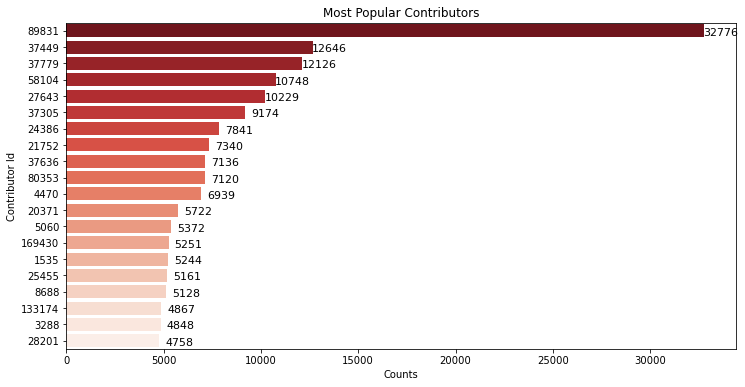

In [21]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(y=df['contributor_id'], order=df['contributor_id'].value_counts().index[:20], palette='Reds_r')
for p in ax.patches:
    ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(34, -11), 
                fontsize=11,color='black', textcoords='offset points', horizontalalignment='right')
plt.title('Most Popular Contributors')
plt.xlabel('Counts')
plt.ylabel('Contributor Id')
plt.show()

**The contributor ID with the most comments on the recipe she/he submitted is 89831.**

## User Analysis

In [22]:
# how many unique user are there ? 

df['user_id'].nunique()

223166

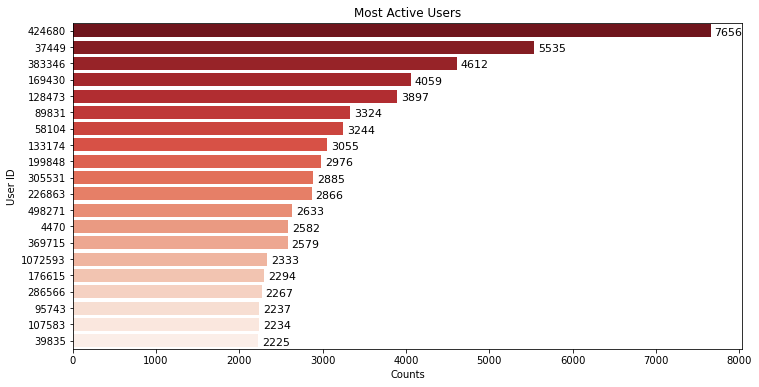

In [23]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(y=df['user_id'], order=df['user_id'].value_counts().index[:20], palette='Reds_r')
for p in ax.patches:
    ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(32, -11), 
                fontsize=11,color='black', textcoords='offset points', horizontalalignment='right')
plt.title('Most Active Users')
plt.xlabel('Counts')
plt.ylabel('User ID')
plt.show()

**Most active user id is 424680**

## Rating Analysis

**Rating - Nutritions Relationship**

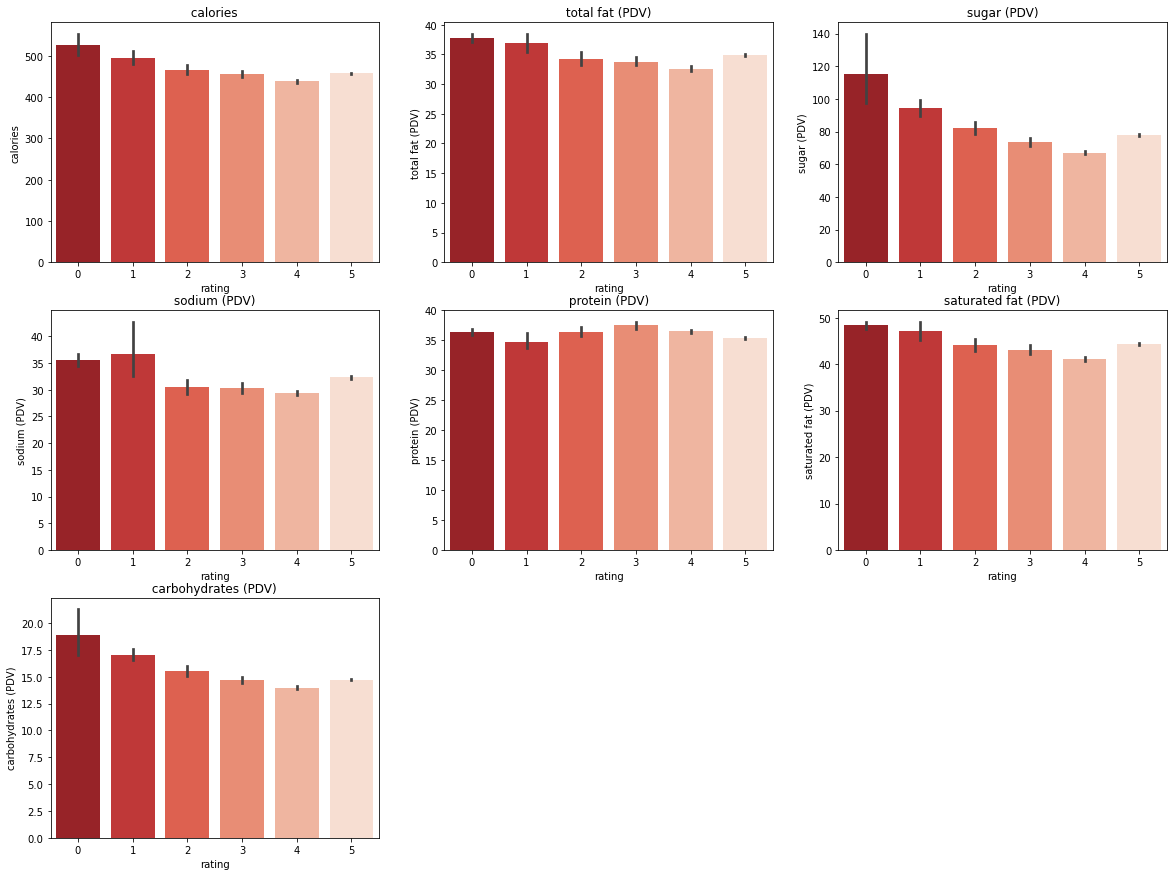

In [24]:
nutritions = ['calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 
             'saturated fat (PDV)','carbohydrates (PDV)']

plt.figure(figsize=(20, 15))
for i, col in enumerate(nutritions):
    plt.subplot(3, 3, i+1)
    sns.barplot(y=col, x='rating', data=df, palette='Reds_r')
    plt.title(f" {col} ")
plt.show()

**As the nutritional values increase numerically, the ratings appear to decrease, but hypothesis tests can be applied to determine whether this is statistically significant.**

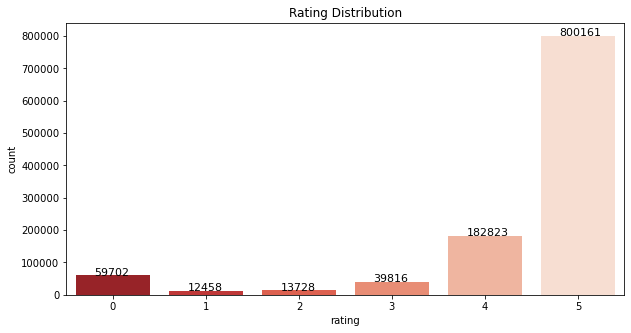

In [25]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='rating', data=df, palette='Reds_r')
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+110), fontsize=11)
plt.title('Rating Distribution')
plt.show()

**The percentage of users who gave 5 points to the recipes is quite high.**

In [26]:
df["date"].min(), df["date"].max()

(Timestamp('2000-01-25 00:00:00'), Timestamp('2018-12-20 00:00:00'))

In [27]:
df['year'] = df.date.dt.year

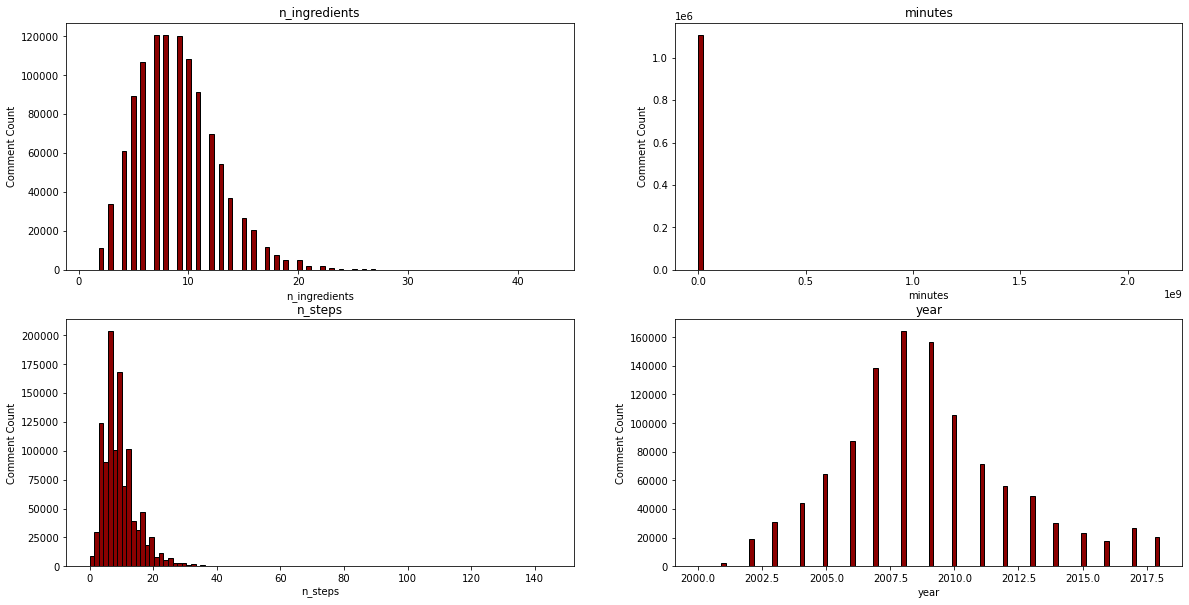

In [28]:
cols = ['n_ingredients', 'minutes', 'n_steps', 'year']

plt.figure(figsize=(20, 10))
for i, col in enumerate(cols):
    plt.subplot(2, 2, i+1)
    plt.hist(df[col], color='darkred', edgecolor='black',
         bins=100)
    plt.xlabel(f'{col}')
    plt.ylabel('Comment Count')
    plt.title(f'{col}');
plt.show()    

**The number of ingredients , the number of steps and minutes are quite right-skewed.**

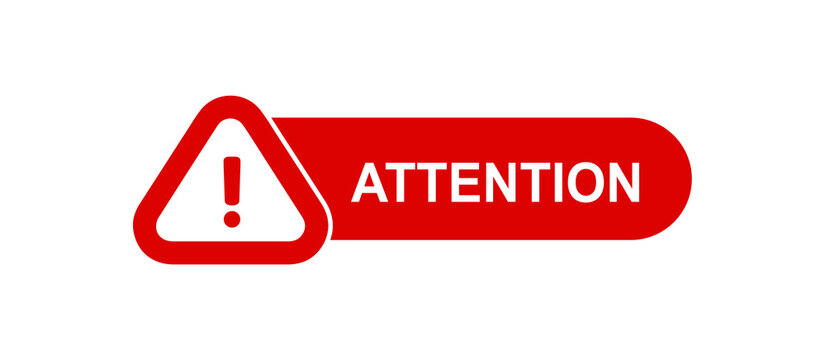

### ! The number of comments has been declining in recent years. 

## Outlier Analysis

In [29]:
df.describe([.05, .1, .25, .75, .9, .95, .99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
recipe_id,1108688.00,163684.76,130224.16,38.00,15826.00,26041.00,57497.00,124617.00,247616.25,369404.90,427641.65,497021.00,537716.00
minutes,1108688.00,36916.48,8889932.33,0.00,5.00,10.00,21.00,40.00,70.00,150.00,305.00,960.00,2147483647.00
contributor_id,1108688.00,2703060.96,68338540.23,27.00,7802.00,20371.00,37636.00,91340.00,246482.00,512060.00,795588.00,1701377.00,2002289981.00
n_steps,1108688.00,9.64,5.82,0.00,3.00,4.00,6.00,8.00,12.00,17.00,20.00,29.00,145.00
n_ingredients,1108688.00,8.96,3.70,1.00,4.00,5.00,6.00,9.00,11.00,14.00,16.00,20.00,43.00
user_id,1108688.00,139540210.30,503272042.48,1533.00,32570.00,53932.00,136979.00,333990.00,806997.00,2175492.20,2000299880.75,2001976150.47,2002372706.00
rating,1108688.00,4.41,1.26,0.00,0.00,3.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00
calories,1108688.00,459.07,1035.09,0.00,64.10,97.50,176.40,312.60,512.60,832.20,1204.80,3087.86,434360.20
total fat (PDV),1108688.00,34.60,73.47,0.00,0.00,2.00,9.00,20.00,40.00,70.00,104.00,265.00,17183.00
sugar (PDV),1108688.00,78.11,640.64,0.00,1.00,2.00,9.00,24.00,67.00,157.00,252.00,1012.00,362729.00


In [30]:
2147483647.000 / 60 / 24 / 365 # :) 

4085.7755840943687

**4085 years? Is it possible for any food to contain 434360.20 calories**

**It is also clear that there are outliers in the data set. In addition, I'm really curious about the recipe containing 43 ingredients :)** 

In [31]:
df[df['n_ingredients'] == 43]['name'].unique()

array(['a to z bread'], dtype=object)

In [32]:
df[df['n_ingredients'] == 43]['ingredients'].values[0]

"['sugar', 'vegetable oil', 'eggs', 'vanilla extract', 'all-purpose flour', 'cinnamon', 'baking powder', 'baking soda', 'salt', 'walnuts', 'apples', 'applesauce', 'apricots', 'bananas', 'carrots', 'cherries', 'fresh coconut', 'dates', 'eggplants', 'figs', 'seedless grapes', 'honey', 'lemon juice', 'marmalade', 'mincemeat', 'oranges', 'peaches', 'of fresh mint', 'pears', 'crushed pineapple', 'prune', 'canned pumpkin', 'raisins', 'raspberries', 'rhubarb', 'fresh strawberries', 'frozen strawberries', 'sweet potatoes', 'tapioca', 'tomatoes', 'yams', 'yogurt', 'zucchini']"

#### My approach will be to thresh the outliers a bit so as not to break the structure of the dataset.

In [33]:
def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable, q1=0.01, q3=0.99):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=q1, q3=q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [34]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O']

In [35]:
num_cols = [col for col in num_cols if 'id' not in col ]

In [36]:
for col in num_cols:
    if col in ['n_steps', 'n_ingredients']:
        replace_with_thresholds(df, col, q1=.05, q3=.95)
    else:
        replace_with_thresholds(df, col)

## Bonus : Text Analysis

In [37]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}

In [38]:
def preprocess_sentences(text):
    text = text.lower()
    temp_sent =[]
    words = nltk.word_tokenize(text)
    tags = nltk.pos_tag(words)
    for i, word in enumerate(words):
        if tags[i][1] in VERB_CODES: 
            lemmatized = lemmatizer.lemmatize(word, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(word)
        if lemmatized not in stop_words and lemmatized.isalpha():
            temp_sent.append(lemmatized)
          
    finalsent = ' '.join(temp_sent)
    return finalsent

- Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item.
- Tokenizers divide strings into lists of substrings. 
-  The process of classifying words into their parts of speech and labeling them accordingly is known as  POS-tagging. Parts of speech are also known as word classes or lexical categories .

In [39]:
df['ingredients'] = df['ingredients'].str.replace('[^\w\s]', '')

In [40]:
df['ingredients'][5]

'prepared pizza crust sausage patty eggs milk salt and pepper cheese'

In [41]:
df['ingredients'] = df['ingredients'].apply(preprocess_sentences)

In [42]:
df['ingredients'][5]

'prepared pizza crust sausage patty egg milk salt pepper cheese'

**Some Changes**
- eggs >> egg
- and   >>  - 

In [43]:
df['name'][:15]

0     arriba   baked winter squash mexican style
1     arriba   baked winter squash mexican style
2     arriba   baked winter squash mexican style
3               a bit different  breakfast pizza
4               a bit different  breakfast pizza
5               a bit different  breakfast pizza
6               a bit different  breakfast pizza
7                      all in the kitchen  chili
8                             alouette  potatoes
9                             alouette  potatoes
10            amish  tomato ketchup  for canning
13                         aww  marinated olives
14                backyard style  barbecued ribs
17                       beat this  banana bread
18                       beat this  banana bread
Name: name, dtype: object

In [44]:
df['name'] = df['name'].apply(preprocess_sentences)

In [45]:
df['name'][:15]

0     arriba bake winter squash mexican style
1     arriba bake winter squash mexican style
2     arriba bake winter squash mexican style
3               bit different breakfast pizza
4               bit different breakfast pizza
5               bit different breakfast pizza
6               bit different breakfast pizza
7                               kitchen chili
8                             alouette potato
9                             alouette potato
10                       amish tomato ketchup
13                         aww marinate olive
14                backyard style barbecue rib
17                          beat banana bread
18                          beat banana bread
Name: name, dtype: object

**Some Changes**
 - barbecued >> barbecue
 - olives    >> olive

In [46]:
df['review'][119]

"This is pretty good!  I made a couple of minor substitutions:  I don't have beef bouillion because I usually have beef stock on hand, so I used the stock instead of the water and bouillion.  If I were to use bouillion, I would leave out the 2-1/2 tsp salt.  I seared the beef in a skillet on high heat, then deglazed the pan with a little red wine, putting that in the crockpot, too.  I added garlic and used fresh herbs.  The Beau had 3 helpings!"

In [47]:
df['review'] = df['review'].apply(preprocess_sentences)

In [49]:
df['review'][119]

'pretty good make couple minor substitution beef bouillion usually beef stock hand use stock instead water bouillion use bouillion would leave tsp salt sear beef skillet high heat deglaze pan little red wine put crockpot add garlic use fresh herb beau helping'

**Some Changes**
- substitutions >> substituion 
- seared        >> sear
- putting       >> put

In [50]:
def create_wordcloud(dframe, col='ingredients', rating=False, name=False, collocations=False, max_words=100):

    
    if rating:
        for rating in range(0,6):
            text = " ".join(i for i in dframe.loc[dframe['rating']==rating, col])
        
            print("Word Cloud for Rating: %s"%(rating))
            print('='*60)
       
            mask = np.array(Image.open("food.jpg"))
            wordcloud = WordCloud(collocations=collocations, background_color="black", mode="RGBA",max_font_size=100, max_words=max_words, mask=mask).generate(text)

            # Display the generated image:

            image_colors = ImageColorGenerator(mask)
            plt.figure(figsize=(20, 10))
            plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
            plt.axis("off")
            plt.show()

    else:
            text = " ".join(i for i in dframe[col])
            mask = np.array(Image.open("food.jpg"))
            wordcloud = WordCloud(collocations=collocations, background_color="black", mode="RGBA", max_font_size=100, max_words=max_words, mask=mask).generate(text)

            # Display the generated image:

            image_colors = ImageColorGenerator(mask)
            plt.figure(figsize=(20, 10))
            plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
            plt.axis("off")
            plt.show()

#### The most common words in the name of the recipe

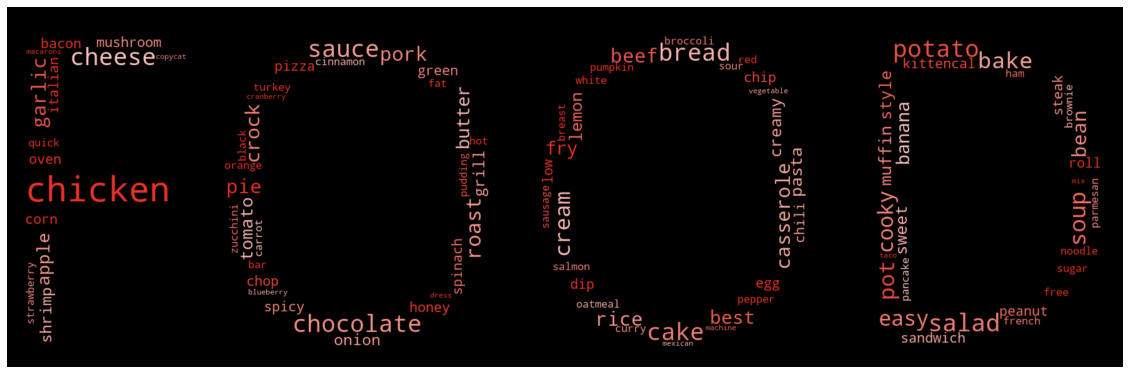

In [51]:
create_wordcloud(dframe=df, col='name')

#### The most common words in the ingredients

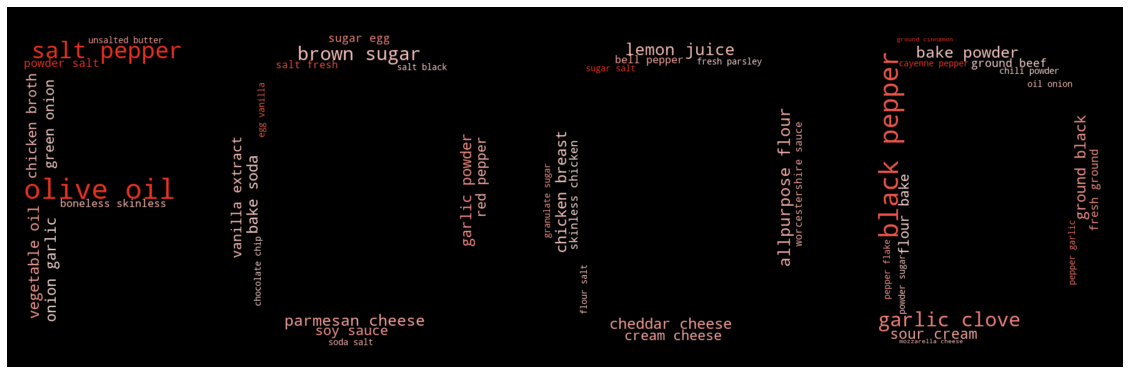

In [52]:
create_wordcloud(dframe=df, col='ingredients', collocations=True, max_words=50)

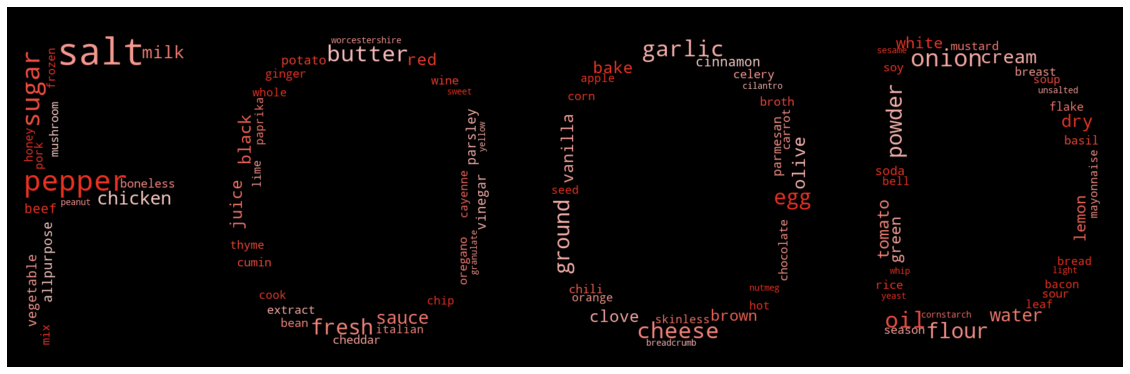

In [54]:
create_wordcloud(dframe=df, col='ingredients', collocations=False)

**Note**
*Collocations are expressions of multiple words which commonly co-occur.

#### The most common words in the reviews

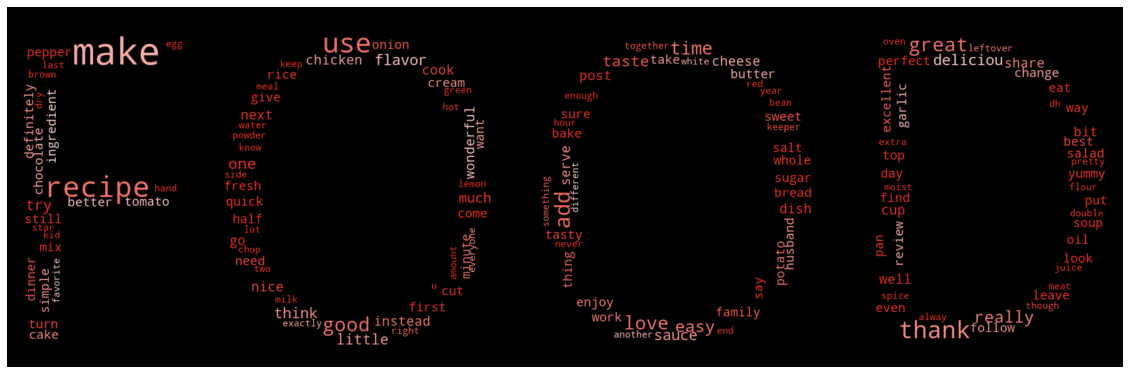

In [55]:
create_wordcloud(dframe=df, col='review', max_words=150)

### Sentiment Analysis

In [56]:
sia = SentimentIntensityAnalyzer()

In [57]:
df['polarity_score'] = df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [58]:
df['sentiment_label'] = df['review'].apply(lambda x: 'positive' if sia.polarity_scores(x)['compound'] > 0 else 'negative')

In [59]:
df["sentiment_label"].value_counts()

positive    1061876
negative      46812
Name: sentiment_label, dtype: int64

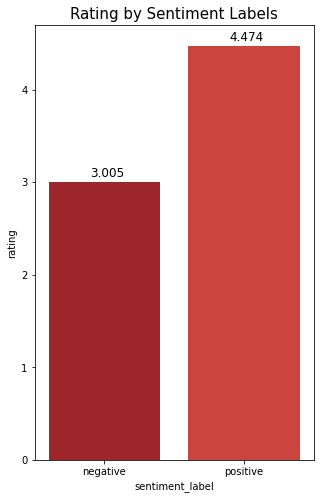

In [62]:
plt.figure(figsize=(5,8))
label_ratings = df.groupby('sentiment_label')[['rating']].mean().reset_index()
palette = sns.color_palette("Reds_r", 5)
ax = sns.barplot(x='sentiment_label',y='rating', data=label_ratings, palette=palette)
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.05), fontsize=12)
plt.title('Rating by Sentiment Labels', fontsize=15)
plt.show()

#### It is seen that the average rating of the content with negative comments is quite low.